# Unsupervised Learning 

# 1.0 Clustering - Application to a real-world problem 

    [Using hierarchical clustering to understand lung cancer](http://www.pnas.org/content/98/24/13790#F3)

Knowing what type of lung cancer a patient has can be challenging. In one study, experts agreed only 41% of the time! [1]. This is probably because human experts can't analyse 12,600 gene transcript sequences in 186 lung tumor samples just by themselves. This is where machine learning can help. Using unsupervised clustering, can you analyse the genetic profiles lung cancer patients to pinpoint markers of certain substypes of cancer? [2]

[1] (Sorensen J B, Hirsch F R, Gazdar A, Olsen J E(1993) Cancer 71:2971–2976, pmid:8387872.  
[2] https://www.ncbi.nlm.nih.gov/pubmed/11707567

# 1.1 Clustering to find lung cancer subtypes 

Get the data from [here]()  
For an introduction into how to clustering and heatmaps are used, see [here](http://genomicsclass.github.io/book/pages/clustering_and_heatmaps.html)

In [1]:
import pandas as pd 
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
import scipy.spatial.distance as dist 

from pylab import rcParams
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
dfA = pd.read_csv('data/interim/DatasetA_12600gene.csv', index_col=['probe set','gene'])
dfA.head()

,,AD-043T2-A7-1,AD-111T2-A8-1,AD-114T1-A9-1 *,AD-115T1-A12-1 *,AD-118t1-A13-1,AD-119t3-A195-8,AD-120t1-A226-8 *,AD-122t3-A197-8,AD-123T1-A25-1 *,AD-127T1-A14-1,...,COID-COID14t1-A351-6,COID-COID16t1-A352-6,COID-COID18t1-A353-6,COID-COID3t1-A340-6,COID-COID4t1-A341-6,COID-COID5t1-A342-6,COID-COID6t1-A343-6,COID-COID7t1-A344-6,COID-COID8t1-A345-6,COID-COID9t1-A346-6
probe set,gene,,,,,,,,,,,,,,,,,,,,,
AFFX-MurIL2_at,interleukin 2,-18.60,9.12,-2.175,-1.540,-9.07,-16.58,-15.895,-14.50,-25.595000,1.23,...,22.21,16.69,-14.63,7.57,1.68,35.14,-21.15,26.90,23.80,-18.37
AFFX-MurIL10_at,interleukin 10,10.54,9.12,-2.210,21.750,3.08,-20.09,10.880,-10.48,2.175000,24.74,...,21.36,26.76,9.92,17.54,-7.45,106.16,-31.20,10.44,29.14,-1.03
AFFX-MurIL4_at,interleukin 4,0.01,10.18,-0.060,5.835,-1.98,-8.39,1.610,3.61,0.224999,12.98,...,36.63,8.64,-10.76,14.48,6.66,52.28,-11.82,18.23,31.80,-8.26
AFFX-MurFAS_at,"tumor necrosis factor receptor superfamily, member 6",19.44,29.29,6.320,23.815,17.26,4.49,23.845,12.67,21.545000,32.96,...,50.21,42.87,31.91,41.33,23.26,65.34,8.28,33.83,65.61,27.15
AFFX-BioB-5_at,"J04423 E coli bioB gene biotin synthetase (-5, -M, -3 represent transcript regions 5 prime, Middle, and 3 prime respectively)",-16.98,-4.68,-1.775,-24.785,-10.09,-18.92,-21.980,-17.52,-18.590000,-19.93,...,22.21,-14.16,-5.59,3.74,-0.81,27.79,-24.74,-11.22,4.24,-23.43


In [3]:
dfA.shape

(12600, 203)

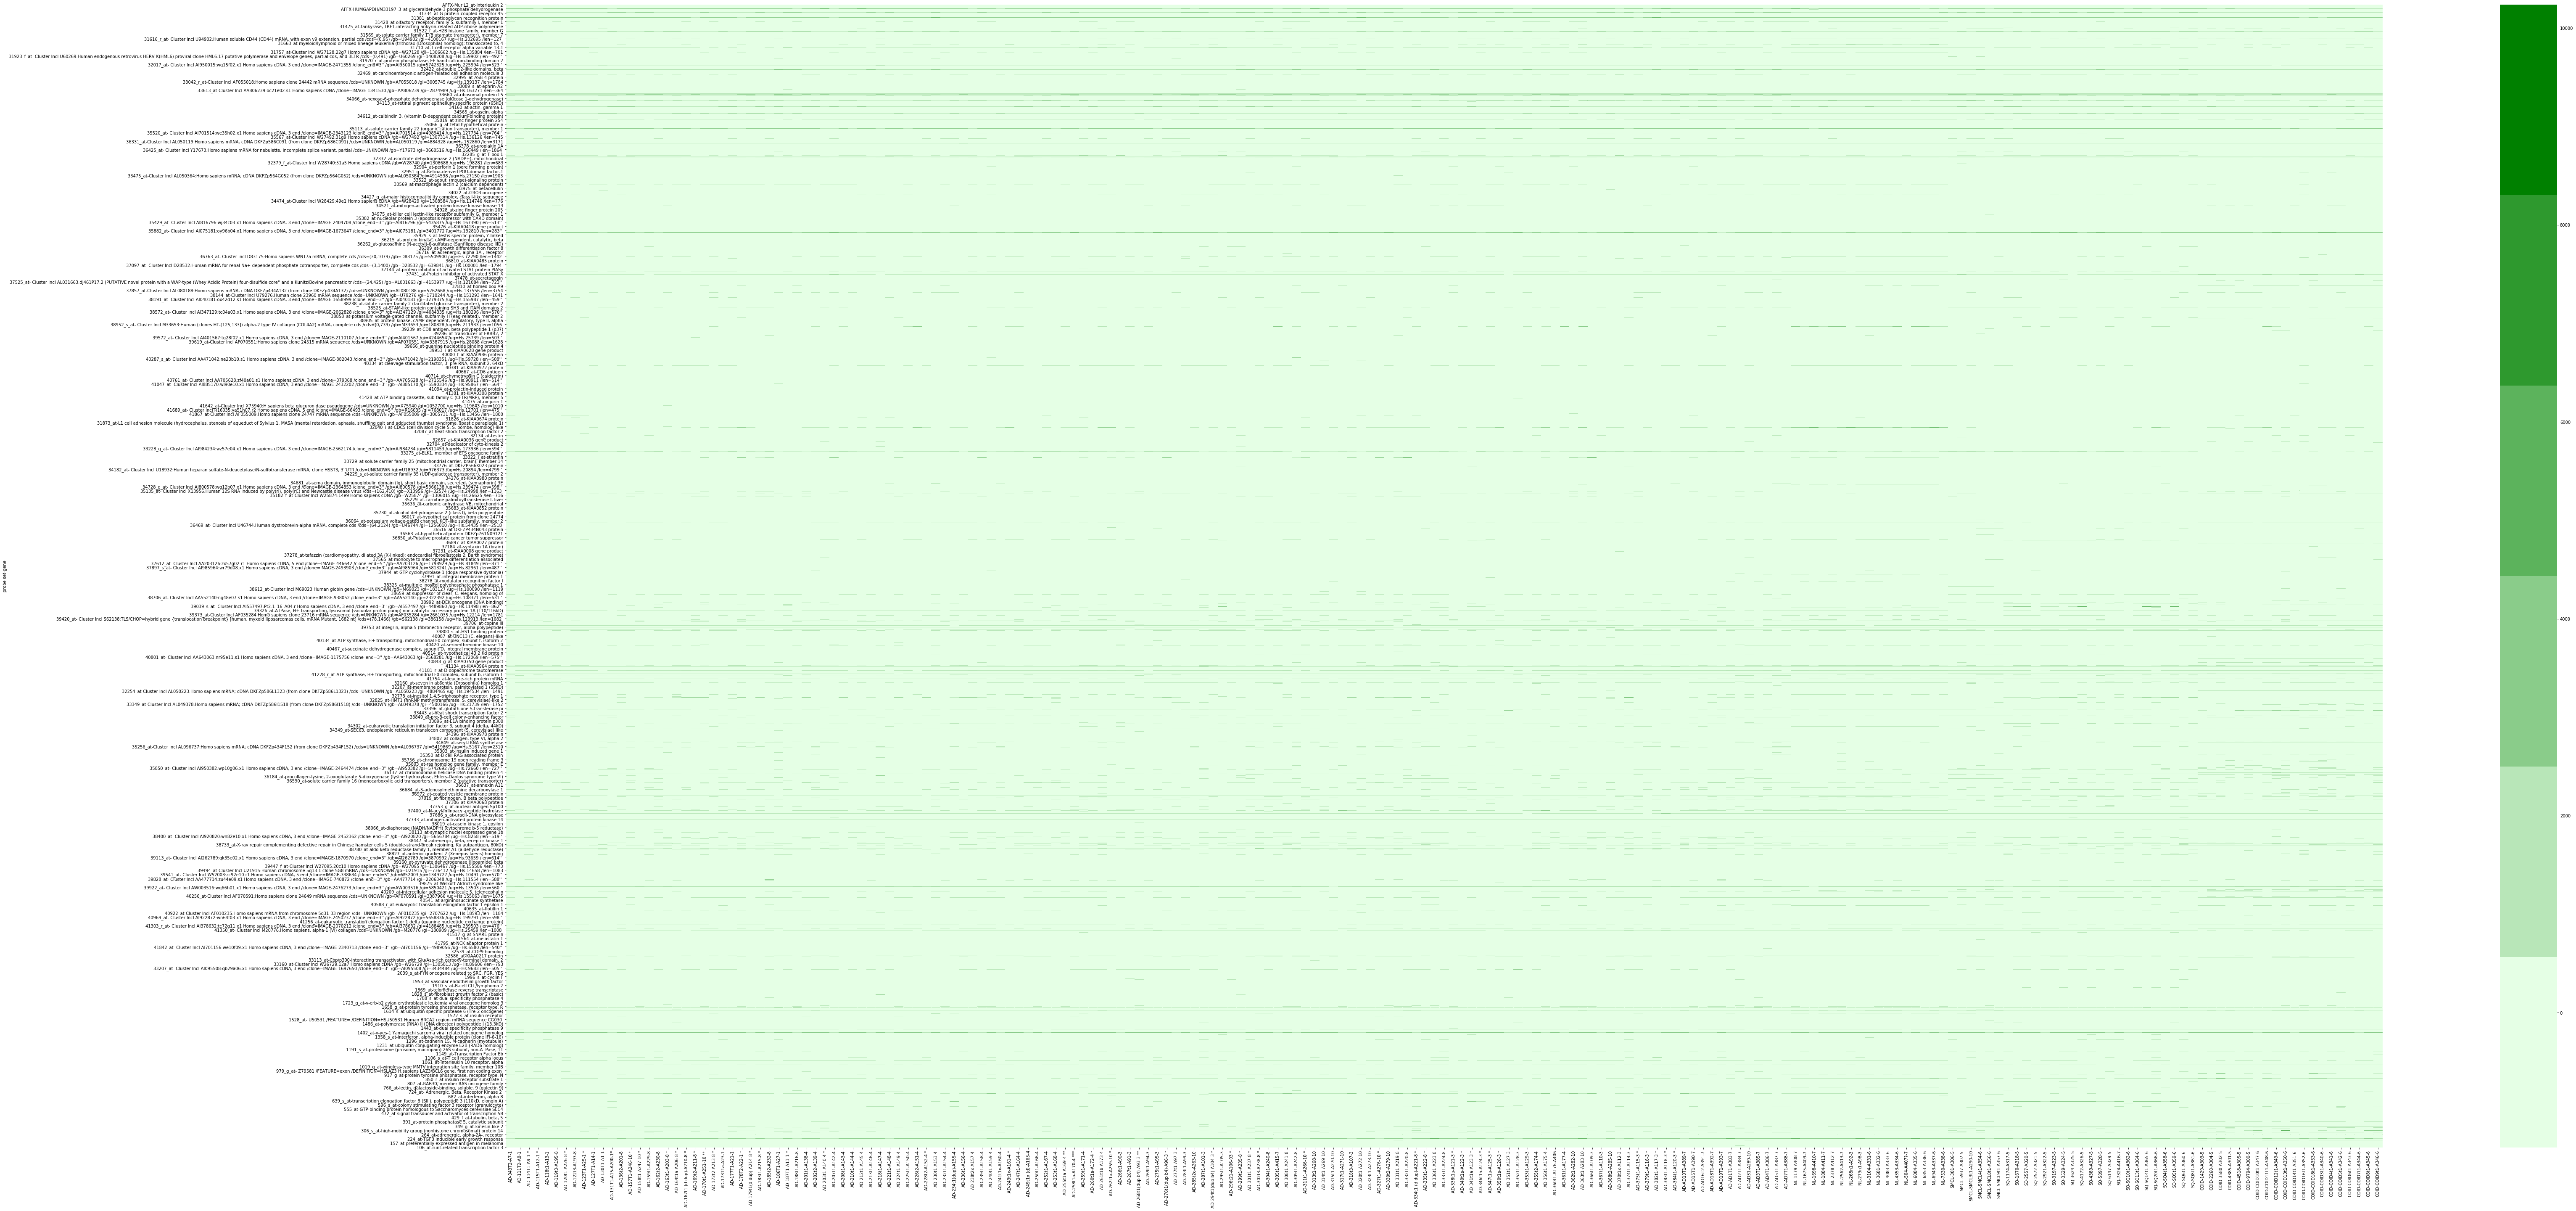

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(100,50)
sns.heatmap(dfA, cmap=sns.light_palette('green'))

# Doesn't look like our heatmap is very effective. What can we do to improve it? 

In [5]:
dfA_floor = pd.read_csv('data/interim/DatasetA_12600gene_floor_Fig1order.csv', index_col=['probe set','gene'])
dfA_floor.head()

,,AD238,AD368,AD330,AD173,AD228,AD207,AD338,AD243,AD226,AD232,...,AD285,AD7,AD5,AD340,AD384,AD043,AD314,AD320,AD241,AD218
probe set,gene,,,,,,,,,,,,,,,,,,,,,
AFFX-MurIL2_at,interleukin 2,0.00,0.00,2.68,8.01,0.000,0.00,38.80,5.865,20.67,8.95,...,9.74,0.0,26.88,43.800,6.510,0.00,8.69,0.00,0.0,0.00
AFFX-MurIL10_at,interleukin 10,19.66,0.00,17.82,24.66,0.585,7.78,63.78,16.180,30.63,17.07,...,17.45,0.0,47.09,37.410,11.320,10.54,2.14,46.72,0.0,0.00
AFFX-MurIL4_at,interleukin 4,5.24,0.00,0.01,35.77,9.840,0.00,58.31,14.230,38.61,16.05,...,25.16,0.0,35.54,36.035,17.535,0.01,10.88,4.70,0.0,10.13
AFFX-MurFAS_at,"tumor necrosis factor receptor superfamily, member 6",23.78,2.54,13.37,48.73,32.125,11.79,88.24,30.485,48.57,24.17,...,2.03,0.0,56.48,55.755,33.800,19.44,29.83,37.83,0.0,29.03
AFFX-BioB-5_at,"J04423 E coli bioB gene biotin synthetase (-5, -M, -3 represent transcript regions 5 prime, Middle, and 3 prime respectively)",0.00,0.00,0.90,9.86,0.000,0.00,46.34,0.000,0.00,0.00,...,12.63,0.0,0.00,33.290,0.000,0.00,0.00,0.00,0.0,3.51


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(30,50)
sns.set(font_scale=2)
sns.heatmap(dfA_floor.iloc[0:30,:], cmap=sns.color_palette("RdBu_r"))

In [ ]:
dfA_floor_filtered = pd.read_csv('data/interim/DatasetA_3312genesetdescription_sd50-2.csv')
dfA_floor_filtered.head()

# 1.2 Visualise the clusters 

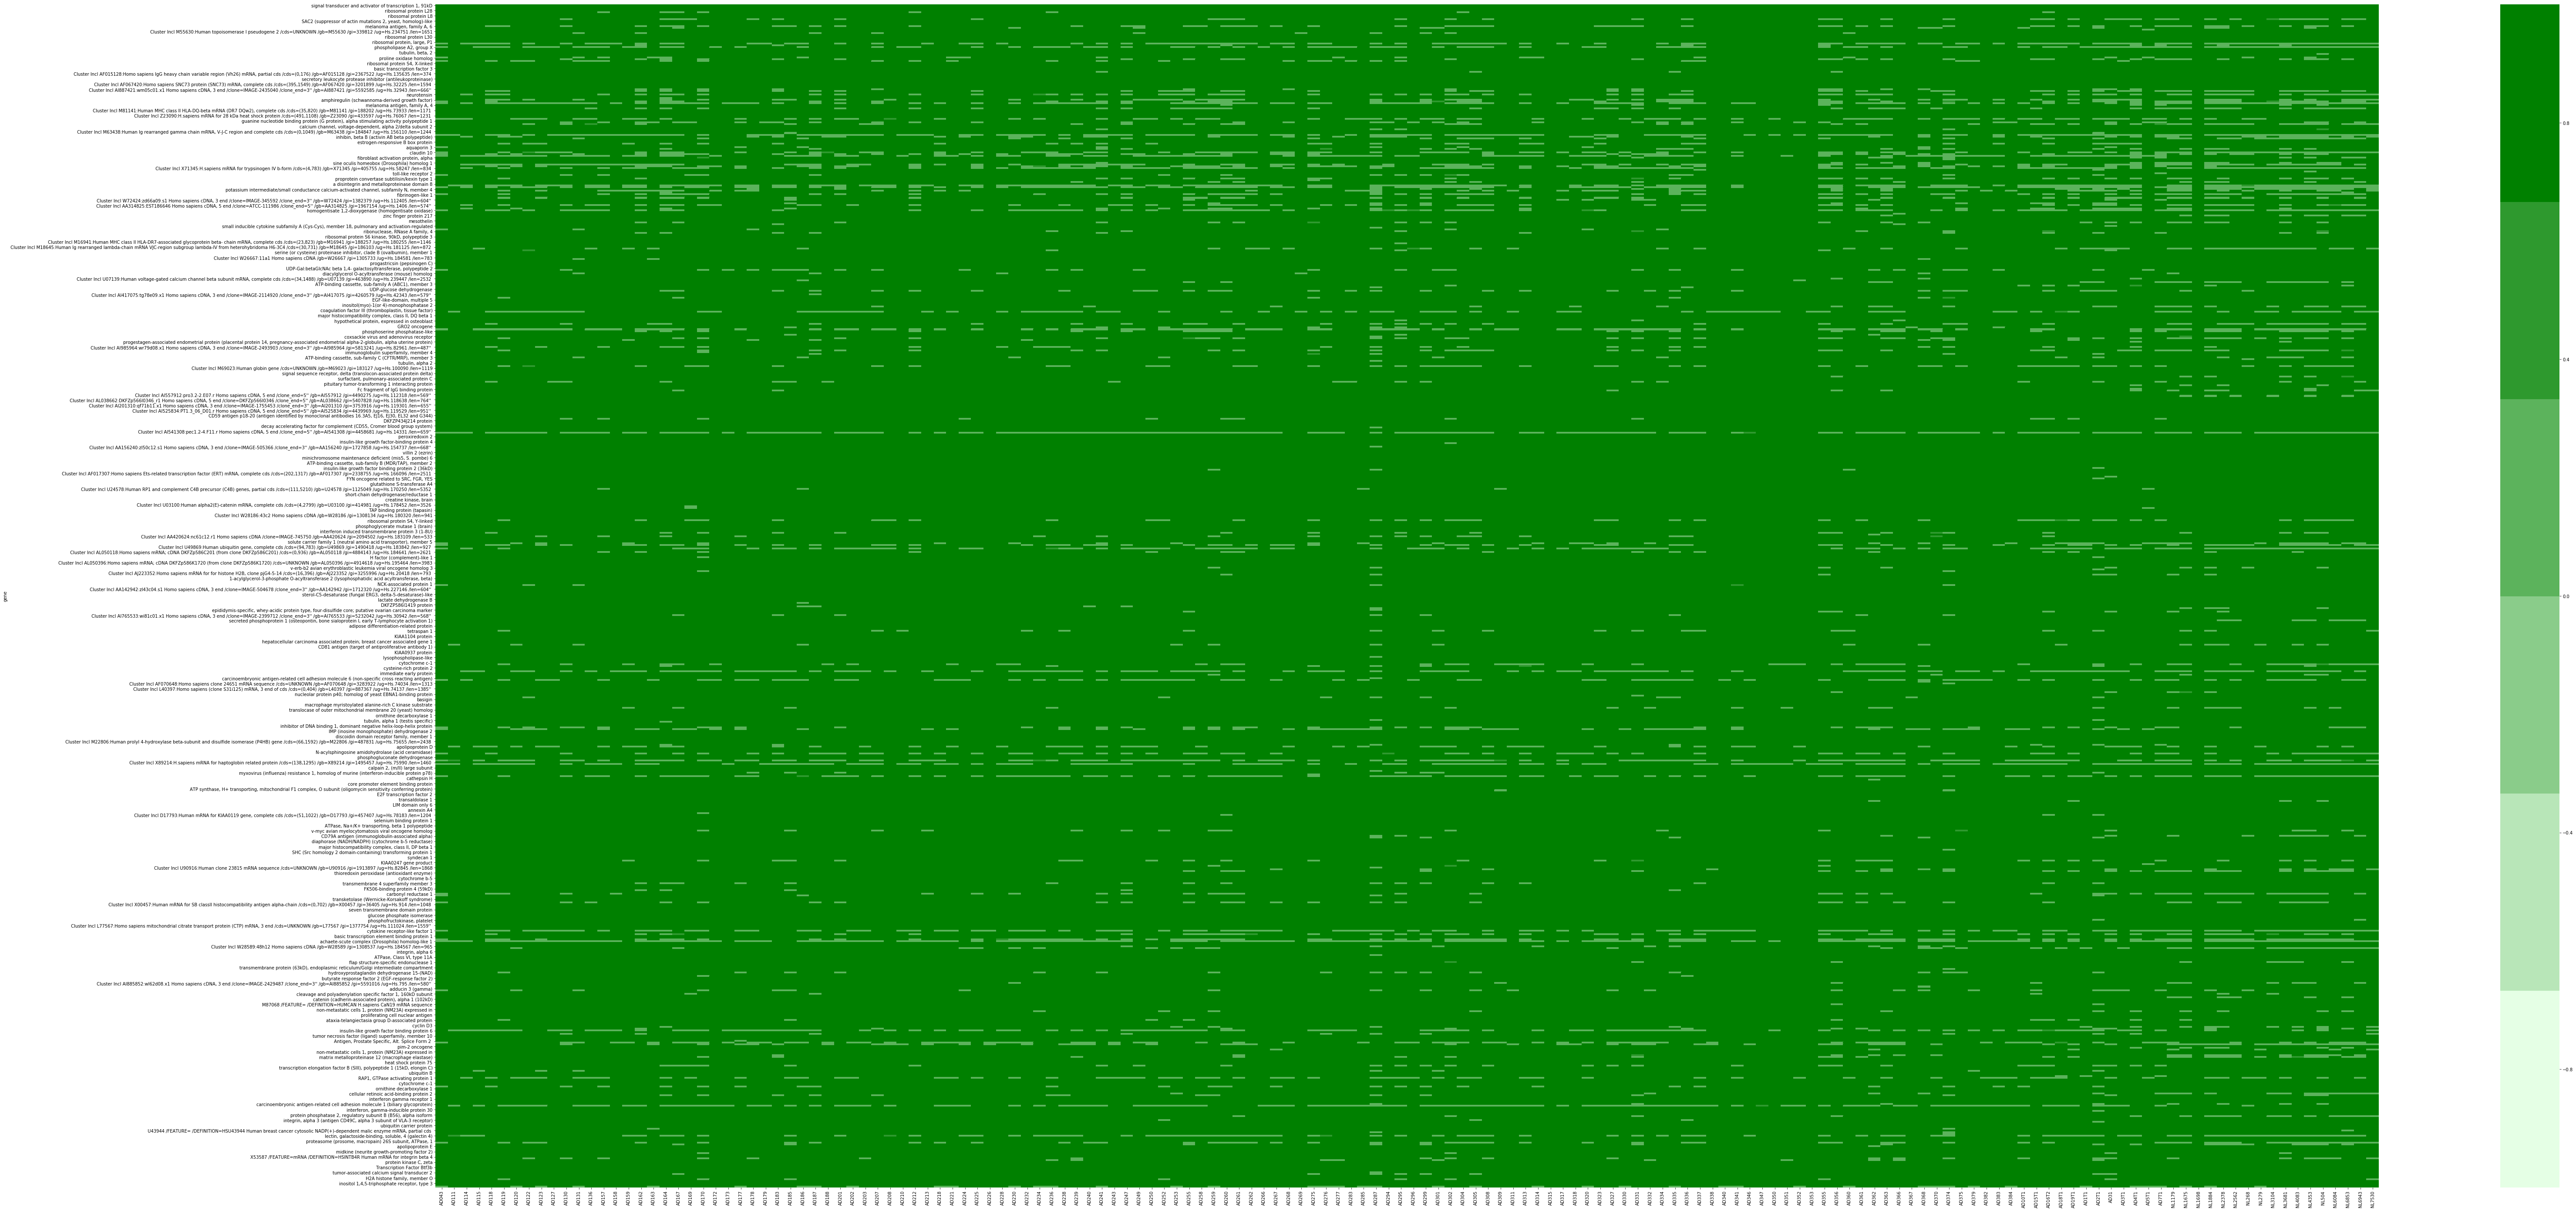

In [6]:
import seaborn as sns 
dfB = pd.read_csv('data/interim/DatasetB_675gene.csv', index_col=['gene'])
fig, ax = plt.subplots()
fig.set_size_inches(100, 50)
sns.heatmap(dfB, vmin=-1, vmax=1, cmap=sns.light_palette("green"))

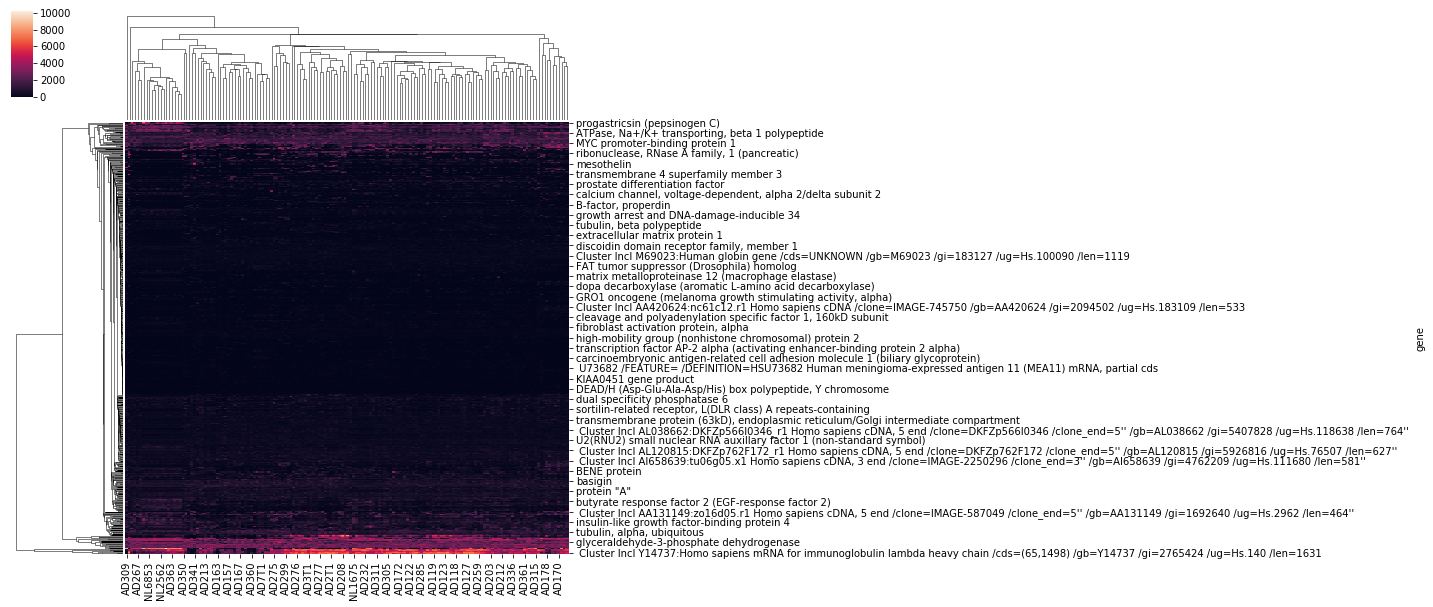

In [20]:
sns.clustermap(dfB)

# Clustering 

In [24]:
dist_dfA = pdist

(12600, 203)

# 1.3 Interpret the clusters
![clustering for adenocarcinoma subclasses](F1.large.jpg)

# 1.4 Validate the clusters 

open-ended question for research? what are some heuristics we might want to use to evaluate the quality of our clusters? 

![clustering for adenocarcinoma subclasses](F2.large.jpg)

In [ ]:
# Futther uses of the dataset 
# using the data to predict disease outcomes 

# [2 Clustering - a more complex approach](http://stke.sciencemag.org/content/9/432/re6)

- some pitfalls: 
    - high-dimensional data means that:
    underlying structure difficult to visualise, 
    valid but confliting clusters found in subsets of the data 
    many interactions in a complex system, in addition to meaningless relationships found by chance 
    - did not cross-validate results with results from other clustering algorithms
    
- some recommendations: 
    - applying cluster validation methods
    - determine statistical and biological significance
    - account for noise 
    - evaluate multiple clustering solutions
    

# 2.1 The effect of high dimensionality on clustering

In [ ]:
# PCA does not capture clusters of cell lines 

In [ ]:
# however selection of one 10 dimensional subspace does 

# 2.2 The effect of parameters on clustering
- transformation, distance metric or algorithm used can drastically alter the clustering result 
![effect of algorithm on clustering results](F4.large.jpg)

# (VIII) Clustering from scratch 

So far we've been learning how to apply clustering to real data. In section 1, we used hierarchical clustering to uncover subclasses of lung cancer that even experts themselves had a low success rate with. In section 2, we validated our cluster by using biological knowledge. This was important so we know that our results are useful to our medical collaborators! 

Now, we are going to step away from learning how to apply a clustering algorithm. Instead, we will work on understanding the mechanics behind the algorithm itself. In this section is a naive explanation of how agglomerative clustering works. Given this explanation, can you implement 

What might be some limitations of your implementation in terms? How might you make the implementation more efficient? (Note that this question is intentionally open-ended because parsing an open-ended question is an important skill in itself) ;) 

## Overview of agglomerative clustering

## Naive form of agglomerative clustering

Introduction to reproducibility? 
keep track at least of different clustering iterations